<a href="https://colab.research.google.com/github/VIKRANT-KUMAR-MALL/loan-emi/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install h2o

     |████████████████████████████████| 164.6MB 97kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.2-py2.py3-none-any.whl size=164620456 sha256=69e1c7813198586904adfef0c41001e7182e3e13527cc17f1bc006316fd48383
  Stored in directory: /root/.cache/pip/wheels/42/bd/ea/218fd15724eddf6fa7fc8fab802b6fa592e623d87199679721
Successfully built h2o


In [ ]:
import pandas as pd
pd.options.display.max_rows=999
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Loan-emi/train.csv')

In [ ]:
data=data.fillna(method='ffill')
X=data.drop(columns=['id','residence_area_type', 'premium'])
y=data['target'].values
y=y.reshape(-1,1)
print(X.shape)

(79853, 10)


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpay9ddov5
  JVM stdout: /tmp/tmpay9ddov5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpay9ddov5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_a67xbj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
h2o_df = h2o.H2OFrame(X)
h2o_df.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:79853
Cols:10




,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,target
type,real,int,int,int,int,int,real,int,enum,int
mins,0.0,7670.0,24030.0,0.0,0.0,0.0,91.9,2.0,,0.0
mean,0.3142877412244997,18846.69690556412,208847.1711770389,0.24866943007776968,0.07816863486656722,0.059985222846981476,99.06606514470391,10.863887393084937,,0.937409990858202
maxs,1.0,37602.0,90262600.0,13.0,17.0,11.0,99.89,60.0,,1.0
sigma,0.3349145654297195,5208.7191357501915,496582.597257461,0.6913746720270398,0.4363807791432687,0.31195098108364,0.7413720451002273,5.17068723797832,,0.2422255863095241
zeros,5723,0,0,66882,75924,76132,0,0,,4998
missing,0,0,0,0,0,0,0,0,0,0
0,0.429,12058.0,355060.0,0.0,0.0,0.0,99.02,13.0,C,1.0
1,0.01,21546.0,315150.0,0.0,0.0,0.0,99.89,21.0,A,1.0
2,0.917,17531.0,84140.0,2.0,3.0,1.0,98.69,7.0,C,0.0


In [ ]:
train, test = h2o_df.split_frame(ratios=[.8])
x = train.columns
y1 = 'target'
x.remove(y1)

In [ ]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs = 600, 
                # exclude_algos =['DeepLearning'], 
                seed = 1, 
                # stopping_metric ='logloss', 
                # sort_metric ='logloss', 
                balance_classes = False, 
                project_name ="Prject_1"
) 
# train model and record time % time  
aml.train(x = x, y = y1, training_frame = train) 

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
lb =aml.leaderboard
lb.head(rows = lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201228_123305,0.0484752,0.220171,0.0484752,0.0968152,0.153479
StackedEnsemble_BestOfFamily_AutoML_20201228_123305,0.0484782,0.220178,0.0484782,0.0968358,0.153489
GBM_grid__1_AutoML_20201228_123305_model_1,0.0485131,0.220257,0.0485131,0.0972453,0.153679
GBM_grid__1_AutoML_20201228_123305_model_3,0.0485453,0.22033,0.0485453,0.0968174,0.153521
XGBoost_grid__1_AutoML_20201228_123305_model_5,0.0486804,0.220636,0.0486804,0.100873,0.153613
GBM_5_AutoML_20201228_123305,0.048819,0.22095,0.048819,0.0997603,0.154568
GBM_2_AutoML_20201228_123305,0.04886,0.221043,0.04886,0.0974128,0.154155
GBM_1_AutoML_20201228_123305,0.0489129,0.221163,0.0489129,0.0987587,0.154467
GBM_3_AutoML_20201228_123305,0.0491283,0.221649,0.0491283,0.0978427,0.154484
DeepLearning_grid__1_AutoML_20201228_123305_model_1,0.0491677,0.221738,0.0491677,0.0904641,0.154927


In [ ]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.varimp()

/usr/local/lib/python3.6/dist-packages/h2o/estimators/stackedensemble.py:804: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


[('GBM_grid__1_AutoML_20201228_123305_model_1',
  0.08260080218315125,
  1.0,
  0.8276786265479614),
 ('GBM_grid__1_AutoML_20201228_123305_model_3',
  0.01085213478654623,
  0.13138050115401698,
  0.10874083275033963),
 ('XGBoost_grid__1_AutoML_20201228_123305_model_1',
  0.0019682892598211765,
  0.023828936375906825,
  0.01972270133170932),
 ('DeepLearning_grid__1_AutoML_20201228_123305_model_1',
  0.0014064181596040726,
  0.01702668887507428,
  0.014092626462780934),
 ('GBM_grid__1_AutoML_20201228_123305_model_4',
  0.0010071006836369634,
  0.012192383814916387,
  0.010091375490275589),
 ('DRF_1_AutoML_20201228_123305',
  0.0009980294853448868,
  0.012082564078880857,
  0.010000480041985843),
 ('DeepLearning_grid__1_AutoML_20201228_123305_model_2',
  0.0008248038939200342,
  0.009985422321821907,
  0.008264720632826912),
 ('XGBoost_grid__1_AutoML_20201228_123305_model_4',
  0.00010634753562044352,
  0.00128748792759468,
  0.001065626239608646),
 ('GBM_5_AutoML_20201228_123305',
  3.3

In [ ]:
model = h2o.get_model('GBM_grid__1_AutoML_20201228_123305_model_1') 
model.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.049453105140514035
RMSE: 0.22238054128118773
MAE: 0.0988940461536927
RMSLE: 0.15574210942848413
Mean Residual Deviance: 0.049453105140514035


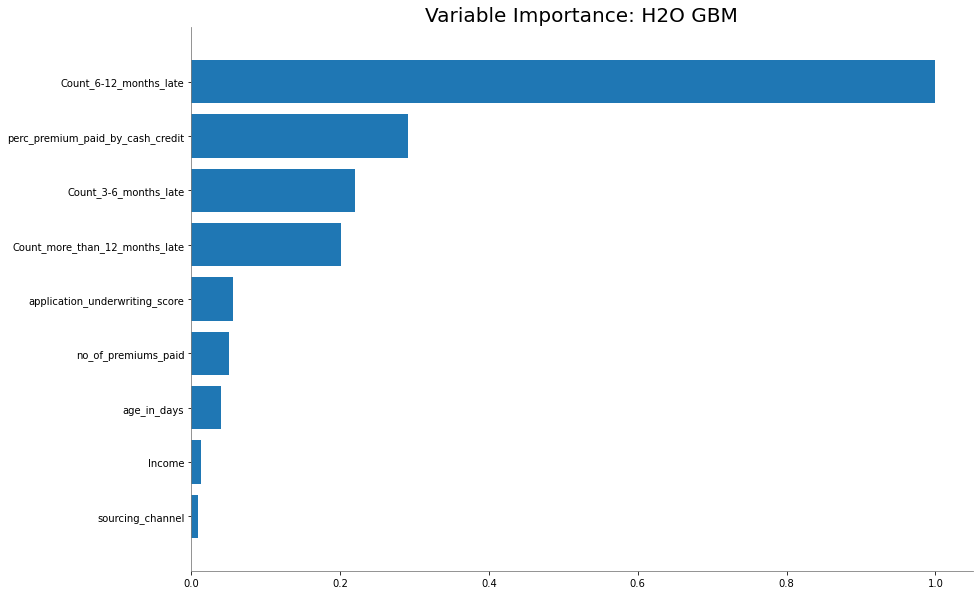

In [ ]:
model.varimp_plot(num_of_features=9)

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20201228_123305,0.0484752,0.220171,0.0484752,0.0968152,0.153479,1995,0.066023
StackedEnsemble_BestOfFamily_AutoML_20201228_123305,0.0484782,0.220178,0.0484782,0.0968358,0.153489,956,0.015441
GBM_grid__1_AutoML_20201228_123305_model_1,0.0485131,0.220257,0.0485131,0.0972453,0.153679,1905,0.00949
GBM_grid__1_AutoML_20201228_123305_model_3,0.0485453,0.22033,0.0485453,0.0968174,0.153521,3463,0.011327
XGBoost_grid__1_AutoML_20201228_123305_model_5,0.0486804,0.220636,0.0486804,0.100873,0.153613,752,0.001321
GBM_5_AutoML_20201228_123305,0.048819,0.22095,0.048819,0.0997603,0.154568,2373,0.008962
GBM_2_AutoML_20201228_123305,0.04886,0.221043,0.04886,0.0974128,0.154155,2110,0.008174
GBM_1_AutoML_20201228_123305,0.0489129,0.221163,0.0489129,0.0987587,0.154467,1607,0.006993
GBM_3_AutoML_20201228_123305,0.0491283,0.221649,0.0491283,0.0978427,0.154484,1948,0.008619
DeepLearning_grid__1_AutoML_20201228_123305_model_1,0.0491677,0.221738,0.0491677,0.0904641,0.154927,2408,0.00375


In [ ]:
model_path = h2o.save_model(model = model, path ='/content/drive/MyDrive/Model', force = True)

In [ ]:
saved_model = h2o.load_model('/content/drive/MyDrive/Model/GBM_grid__1_AutoML_20201228_123305_model_1')

In [ ]:
preds = saved_model.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
preds

predict
0.988973
0.933
0.98336
0.988973
0.95858
0.984617
0.992721
0.972403
0.962802
0.990023
